____

# Decision Trees - Classification.
____

 <img src='download.png' />

Decision tree algorithm is a supervised learning model used in predicting a dependent variable with a series of training variables.Decision trees algorithms can be used for classification and regression purposes.

In this particular project I am going to ilustrate its in classification of a discrete random variable.

## Some questions decision tree can answer.

1. Should a loan applicant be accepted or not?This is based on his/her history with and other measures.

1. Which drug is best for a particular patient.

1. Is a cancerous cell malignant ont benigh.

1. Is an email message spam or not?

and many more scenarios in real life.


## Understanding decision tree algorithm.

Decision trees are built using recursive partitioning to classify the data into two or more groups.

### Real life example.

Lets say we have data of patients who have gone through cancer screening over time.Based on the tests from screening exercises,the cells screened are classified as beningh and malignant.Based on this data a decision tree model can be built to predict these cases with the highest accuracy for future patients better than the doctors.
Decision tree alg splits the data variable by variable starting with the varible with the highest predictive power,less impurity and lower entropy.

The main aim of this method is to minimize impurity and each node.Impurity of nodes is calculated by **entropy of data** in the node.

**Entropy.**

Entropy is the amount of information dissorder or simply said is the amount of randomnes in the data or uncertainity.

The entyropy of a dataset depends on how nuch randomness is in the node.It should be noted that the lower the entropy the less uniform the distribution and the purer the node.If a sample is completely homogenous then the entropy is completely zero and if a sample is equaly devided it has an entropy of 1.

In refrence to the above data ,lets say a node has 7 malignant and 1 beningh while another node has 3 malignant and 5 benignh,the former is said to have a low entropy as compared to the latter.

This is how entropy is calculated mathematicaly:

$$Entropy = -p(Malignant)log(p(Malignant))-p(Benigh)log(p(Benigh))$$

The choice of the best tree depends on the node with the highest **Information Gain** after splitting.

**Information Gain**

This is the information that can increase the level of certainity after splitting.This is calculated as follows.

$$IG = Entropy\ of\ the\ tree\ before\ the\ split\ - weighted\ entropy\ after\ the\ split.$$

This process continues to build a basic decision tree.Below is a is a step by step process in python.
## Implimentation with Python.

For this project I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. I will try to create a model that will help predict this.


**Data Features:**

Target Variable.
_'not.fully.paid'_ 1 if customer fully paid and 0 if otherwise

Explanatory Variables.

* _credit.policy:_ 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* _purpose:_ The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* _int.rate:_ The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* _installment:_ The monthly installments owed by the borrower if the loan is funded.
* _log.annual.inc:_ The natural log of the self-reported annual income of the borrower.
* _dti:_ The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* _fico:_ The FICO credit score of the borrower.
* _days.with.cr.line:_ The number of days the borrower has had a credit line.
* _revol.bal:_ The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* _revol.util:_ The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* _inq.last.6mths:_ The borrower's number of inquiries by creditors in the last 6 months.
* _delinq.2yrs:_ The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* _pub.rec:_ The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Ingestion

In [3]:
loan_data = pd.read_csv("loan_data.csv")

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loan_data.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
719,1,all_other,0.1008,387.66,11.775290,21.20,772,6750.041667,74885,0.0,0,0,0,0
3200,1,debt_consolidation,0.0768,212.10,10.548284,22.98,772,3686.000000,3041,7.7,3,0,0,0
4511,1,debt_consolidation,0.0894,95.32,11.338060,23.05,717,8339.958333,14040,67.2,0,0,0,0
6153,1,home_improvement,0.1253,669.33,12.043554,3.43,717,4380.000000,3670,18.9,0,0,0,0
2362,1,debt_consolidation,0.1821,290.07,10.555188,10.76,672,1980.041667,9961,99.6,0,0,0,0


## Exploratory Data Analysis.
This is a brief EDA because the project aims at Decision tree Ilustration.

Text(0.5, 0, 'FICO')

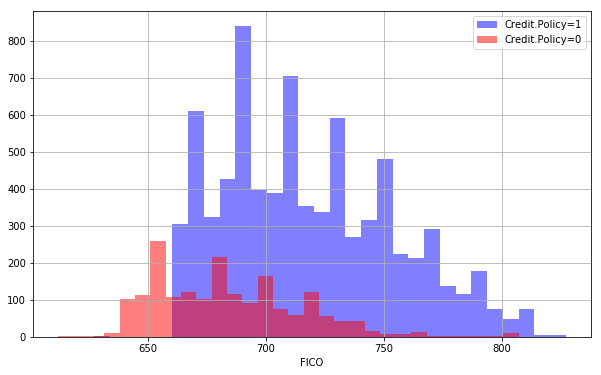

In [7]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

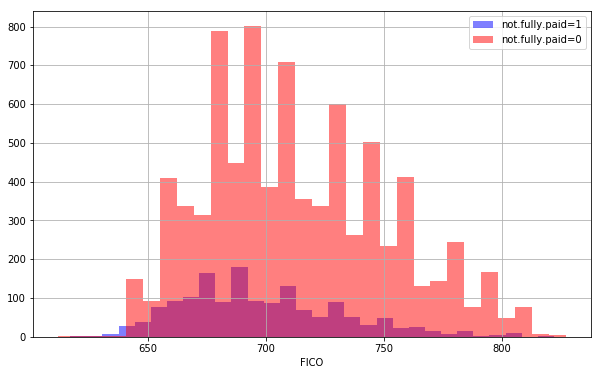

In [8]:
plt.figure(figsize=(10,6))
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

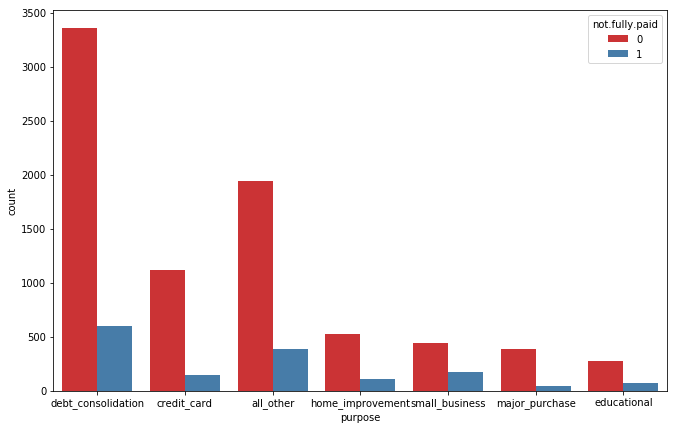

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan_data,palette='Set1')

## Setting Up the Data.

My data here has some categorical variables which i have to tame because the model algorithm may not work well with such data if not formated correctly.

In [10]:
categorical_var = ['purpose']

In [11]:
loan_data2 = pd.get_dummies(data= loan_data,columns=categorical_var,drop_first=True)
loan_data2.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

## Train test Split

In [12]:
from  sklearn.model_selection import train_test_split

In [13]:
X = loan_data2.drop('not.fully.paid',axis = 1)

In [14]:
y = loan_data2['not.fully.paid']

In [15]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=2)

## Training A decision tree model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Model Evaluation

In [19]:
predLoan = loanTree.predict(X_testset)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score

In [21]:
print(classification_report(y_testset,predLoan))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2399
           1       0.50      0.01      0.02       475

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.78      0.83      0.76      2874



This produces a 78% accuracy level

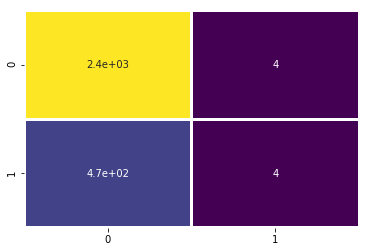

In [22]:
sns.heatmap(confusion_matrix(y_testset,predLoan),cmap="viridis",lw = 2,annot=True,cbar=False)

The decision tree model produces a 78% accuracy which is impressive given that no feature engeneering has been done or even parameter tuning to improve the model.

The precission can be improved also later by applying random forest clasifier algorithm which is better than Simple decision tree as this one.More on that on another kernel.

## Visualization of the decision tree

In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns)
# features

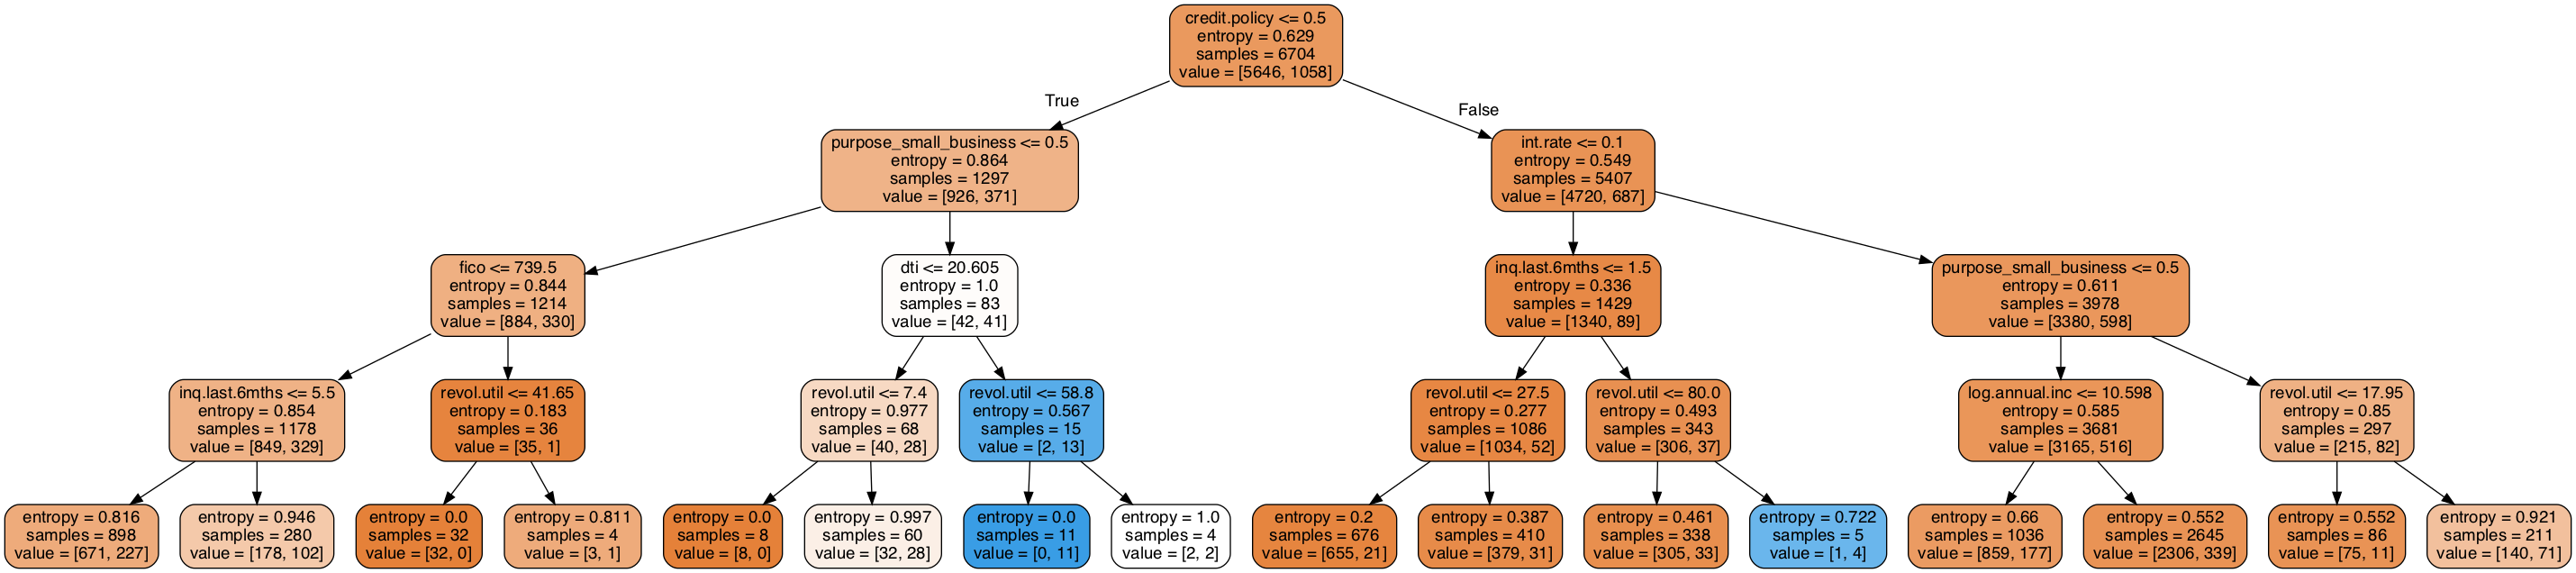

In [24]:
dot_data = StringIO()  
export_graphviz(loanTree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

____

# THE END

____